In [1]:
import os
from pathlib import Path

import torch

from src.data.sampling import extract_sample
from src.inference import load_model_and_data, visualize_inference
from src.utils.device import setup_device

In [2]:
device = setup_device()

# Инференс без SimCLR с лучшей моделью: 5-way, 5-shot, 5-query

In [4]:
model_path = Path(os.getcwd()).parent / "model" / "protonet_without_simclr_5-way, 5-shot, 5-query"
model, test_x, test_y = load_model_and_data(model_path)
model = model.to(device)
None

2025-06-04 16:21:23,258 - inference - INFO - Devise is cuda
2025-06-04 16:21:23,258 - OmniglotLoader - INFO - Loading training data...
2025-06-04 16:21:23,321 - OmniglotLoader - INFO - Loading test data...


In [14]:
n_way = 2
n_support = 5
n_query = 6

In [31]:
sample = extract_sample(n_way, n_support, n_query, test_x, test_y)
loss, output = model.set_forward_loss(sample)
target_inds = torch.arange(0, n_way).view(n_way, 1).expand(n_way, n_query).reshape(-1).to(device)

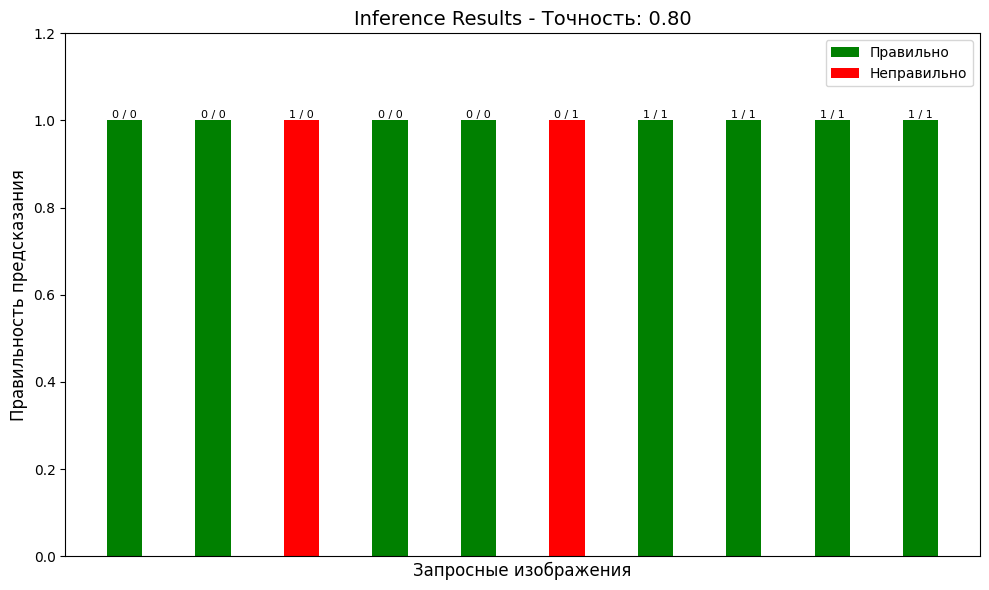

In [32]:
y_hat = output["y_hat"]
acc_val = output["acc"]

visualize_inference(y_hat, target_inds, acc_val)

# Инференс с использованием SimCLR с лучшей моделью: 5-way, 5-shot, 5-query

In [33]:
from src.model.hparams import config
from src.utils.load_protonet_conv import load_protonet_with_simCLR

In [34]:
sim_clr_path = config["simclr_path"]
model = load_protonet_with_simCLR(sim_clr_path).to(device)

In [35]:
loss, output = model.set_forward_loss(sample)
target_inds = torch.arange(0, n_way).view(n_way, 1).expand(n_way, n_query).reshape(-1).to("cpu")

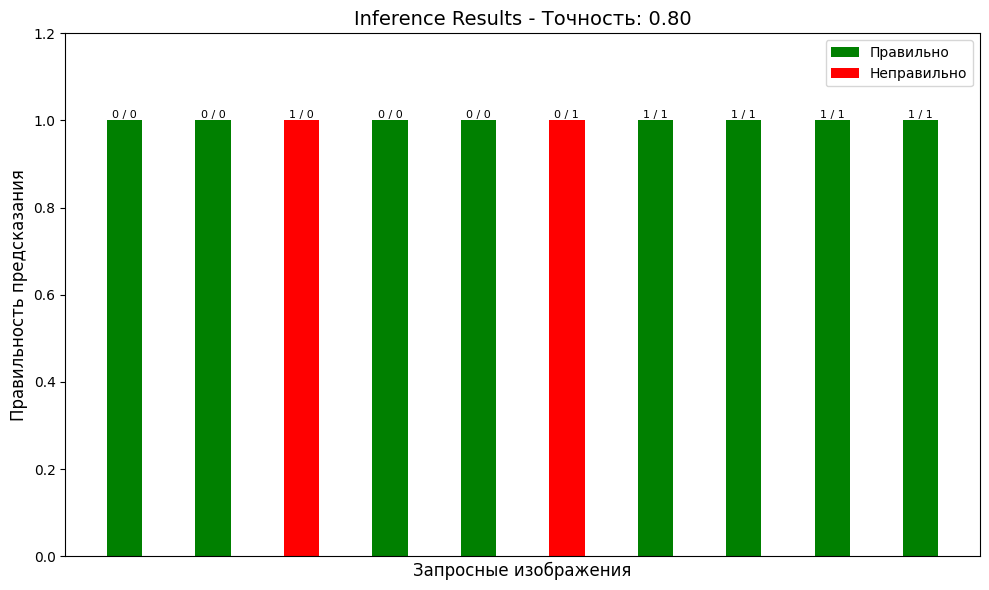

In [36]:
y_hat = output["y_hat"]
acc_val = output["acc"]

visualize_inference(y_hat, target_inds, acc_val)